In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [3]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Data cleaning

In [8]:
#drop the customer id and genre and age to cluster based on income and spending score

In [6]:
df.drop('CustomerID',axis=1,inplace=True)
df.drop('Genre',axis=1,inplace=True)
df.drop('Age',axis=1,inplace=True)

In [12]:
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [51]:
print(f'The shape of data is {df.shape}')

The shape of data is (200, 2)


In [16]:
df.columns

Index(['Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [18]:
#No missing values

In [20]:
df.isna().sum()

Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [24]:
df['Annual Income (k$)'].value_counts()

Annual Income (k$)
54     12
78     12
48      6
71      6
63      6
       ..
58      2
59      2
16      2
64      2
137     2
Name: count, Length: 64, dtype: int64

In [26]:
df['Spending Score (1-100)'].value_counts()

Spending Score (1-100)
42    8
55    7
46    6
73    6
35    5
     ..
31    1
44    1
53    1
65    1
18    1
Name: count, Length: 84, dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Annual Income (k$)      200 non-null    int64
 1   Spending Score (1-100)  200 non-null    int64
dtypes: int64(2)
memory usage: 3.3 KB


In [30]:
df.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


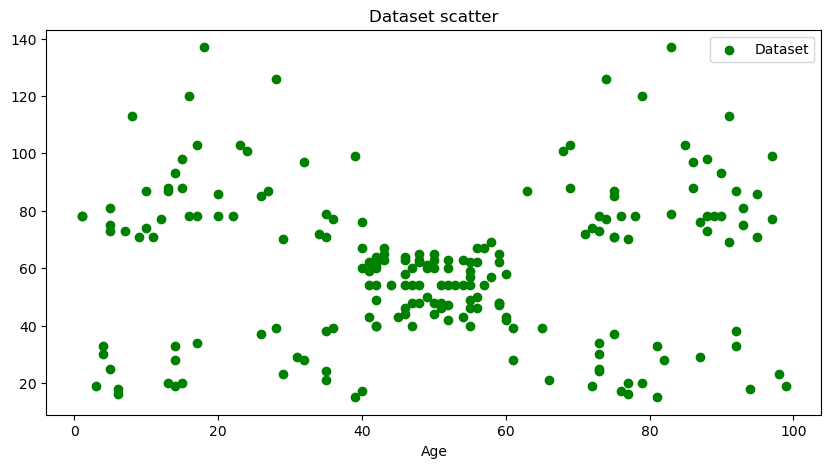

In [39]:
plt.figure(figsize=(10,5))
plt.scatter(df['Spending Score (1-100)'],df ['Annual Income (k$)'],label='Dataset',c='green')
plt.xlabel('Age')
plt.ylabel=('Annual Income (k$)')
plt.title('Dataset scatter')
plt.legend()

In [41]:
#visually we can cluster into 5 segmentations

### Exploratory Data Analysis

C:\Users\marou\AppData\Local\Temp\ipykernel_23388\1358398834.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\marou\AppData\Local\Temp\ipykernel_23388\1358398834.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


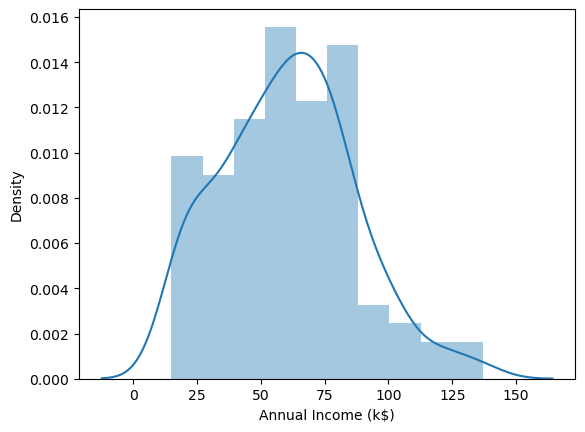

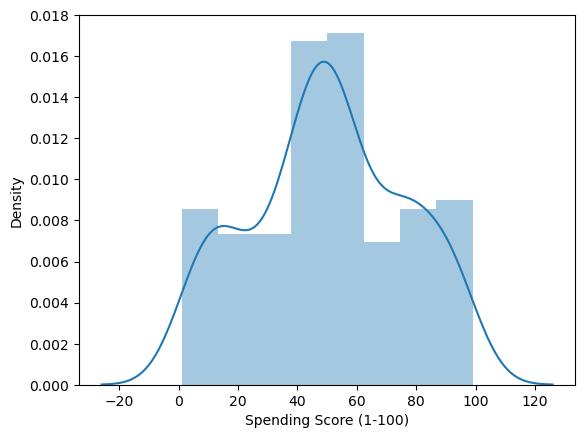

In [33]:
for col in df.select_dtypes('int'):
    plt.figure()
    sns.distplot(df[col])

In [35]:
#The features are not standardised
#the features follow a normal distubition

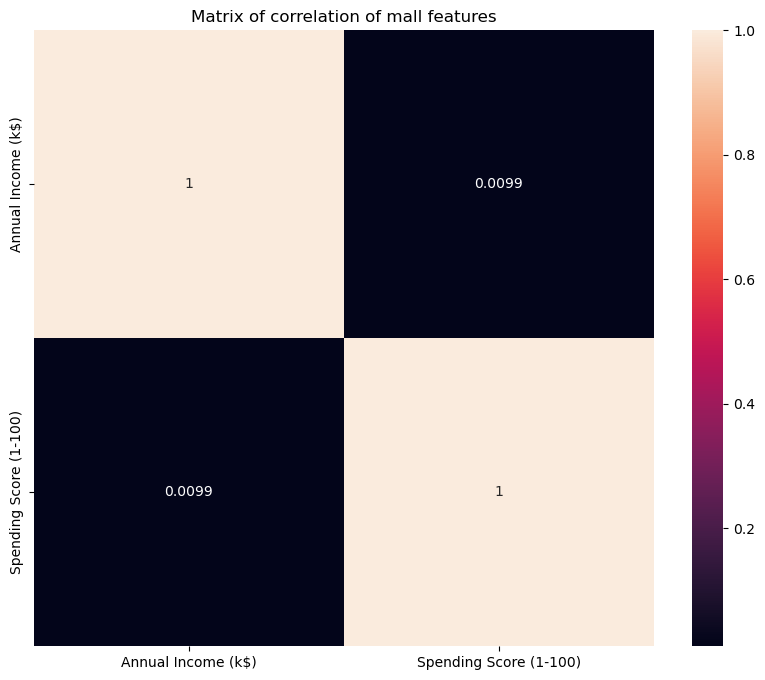

In [45]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title("Matrix of correlation of mall features")
plt.show()

In [47]:
#low correlation between the features

In [53]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [55]:
df=sc.fit_transform(df)

In [63]:
#scaling the features

In [71]:
#we'll check the variance in each cluster to evaluate the model
#wcss=Within-Cluster Sum of Squares

In [67]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,n_init=10)
    km.fit(df)
    wcss.append(km.inertia_)

C:\Users\marou\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\marou\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\marou\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\marou\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

In [77]:
#the elbow method to check to optimal number of clusters

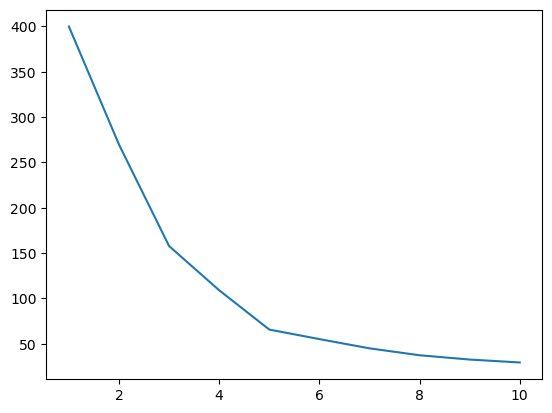

In [75]:
plt.plot(range(1,11),wcss)

In [79]:
#as expected the elbow method shows that the optimal number of clusters is 5

In [81]:
km=KMeans(n_clusters=5,n_init=10)
y_means=km.fit_predict(df)

C:\Users\marou\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [85]:
y_means

array([2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1,
       2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 3, 4, 1, 4, 3, 4, 3, 4,
       1, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4])

Text(0.5, 1.0, 'Clusters')

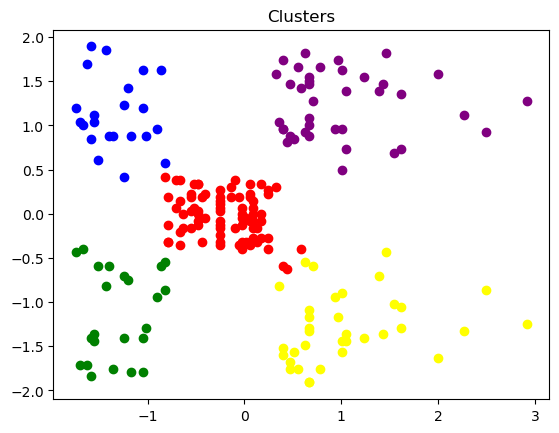

In [89]:
plt.scatter(df[y_means==0,0],df[y_means==0,1],color='blue')
plt.scatter(df[y_means==1,0],df[y_means==1,1],color='red')
plt.scatter(df[y_means==2,0],df[y_means==2,1],color='green')
plt.scatter(df[y_means==3,0],df[y_means==3,1],color='yellow')
plt.scatter(df[y_means==4,0],df[y_means==4,1],color='purple')
plt.title('Clusters')

### Bonus

In [126]:
# add the cluster label column to the dataframe

In [112]:
df=pd.DataFrame(df)

In [118]:
df['cluster_label'] = km.labels_
df

,0,1,cluster_label
0,-1.738999,-0.434801,2
1,-1.738999,1.195704,0
2,-1.700830,-1.715913,2
3,-1.700830,1.040418,0
4,-1.662660,-0.395980,2
...,...,...,...
195,2.268791,1.118061,4
196,2.497807,-0.861839,3
197,2.497807,0.923953,4
198,2.917671,-1.250054,3


In [122]:
# show the clusters statistics
cluster_stats = df.groupby('cluster_label')[df.columns].mean()
cluster_stats

,0,1,cluster_label
cluster_label,,,
0,-1.329545,1.132178,0.0
1,-0.200913,-0.026456,1.0
2,-1.307519,-1.136965,2.0
3,1.055003,-1.284439,3.0
4,0.991583,1.239503,4.0


In [144]:
df.columns=['Annual Income (k$)','Spending Score (1-100)','cluster_label']

In [146]:
df

,Annual Income (k$),Spending Score (1-100),cluster_label
0,-1.738999,-0.434801,2
1,-1.738999,1.195704,0
2,-1.700830,-1.715913,2
3,-1.700830,1.040418,0
4,-1.662660,-0.395980,2
...,...,...,...
195,2.268791,1.118061,4
196,2.497807,-0.861839,3
197,2.497807,0.923953,4
198,2.917671,-1.250054,3


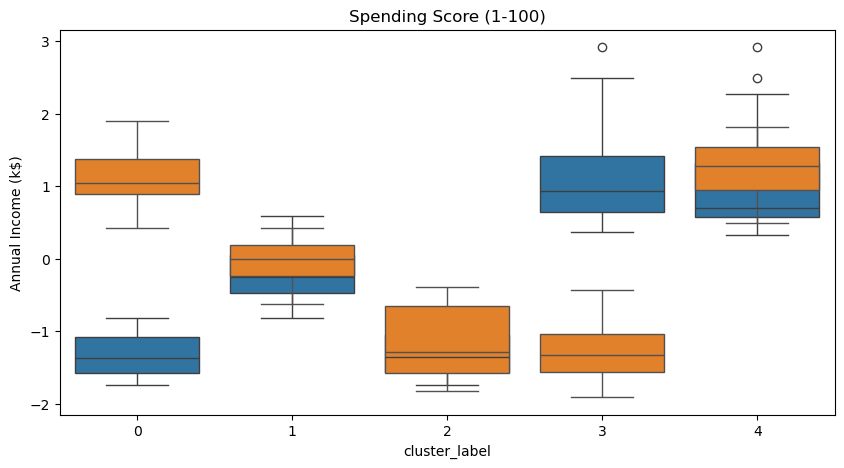

In [176]:
#average spending per cluster
plt.figure(figsize=(10,5))
for column in df[['Annual Income (k$)','Spending Score (1-100)']]:
    sns.boxplot(x='cluster_label', y=column, data=df)
    plt.title(column)

In [252]:
dbscan = DBSCAN(eps=0.4, min_samples=15)

In [254]:
dbscan.fit(df)

DBSCAN(eps=0.4, min_samples=15)

In [256]:
cluster_labels = dbscan.labels_
df['Cluster'] = cluster_labels
df

,Annual Income (k$),Spending Score (1-100),cluster_label,Cluster
0,-1.738999,-0.434801,2,-1
1,-1.738999,1.195704,0,-1
2,-1.700830,-1.715913,2,-1
3,-1.700830,1.040418,0,-1
4,-1.662660,-0.395980,2,-1
...,...,...,...,...
195,2.268791,1.118061,4,-1
196,2.497807,-0.861839,3,-1
197,2.497807,0.923953,4,-1
198,2.917671,-1.250054,3,-1


In [258]:
cluster_stats = df.groupby('Cluster').mean()
cluster_stats

,Annual Income (k$),Spending Score (1-100),cluster_label
Cluster,,,
-1,0.071683,-0.125192,2.181818
0,-0.520945,0.049326,1.000000
1,-0.002290,-0.067291,1.000000
2,0.607148,1.032654,4.000000


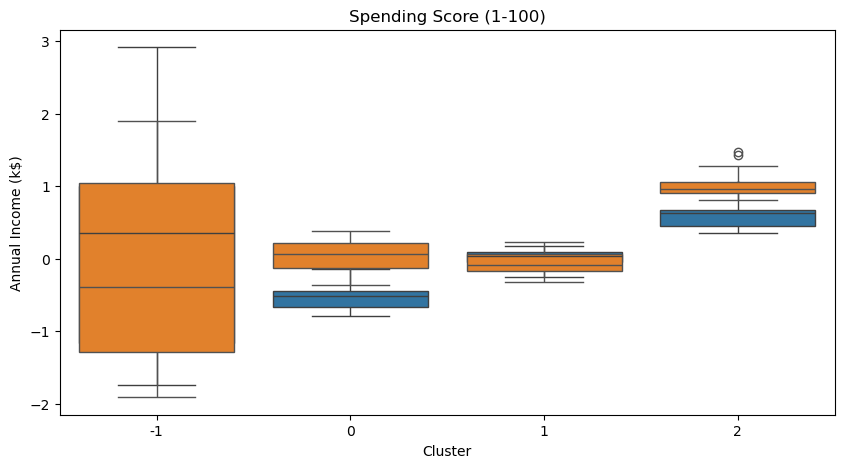

In [260]:
plt.figure(figsize=(10,5))
for column in df[['Annual Income (k$)','Spending Score (1-100)']]:
    sns.boxplot(x='Cluster', y=column, data=df)
    plt.title(column)